Iteration 1 (Datasets: 1500)

In [2]:
#Defining the function and generation of data(rosenbrock, n=9)
import numpy as np
import pandas as pd
import random
l=1500
n=9
inputs = np.random.uniform(-1.0, 1.0, size = (l,n))
x1 = inputs[:,0]
x2 = inputs[:,1]
x3 = inputs[:,2]
x4 = inputs[:,3]
x5 = inputs[:,4]
x6 = inputs[:,5]
x7 = inputs[:,6]
x8 = inputs[:,7]
x9 = inputs[:,8]
Y = []
for j in range(l):
    r=0
    for i in range(n-1):
        r = r + (1.0 - inputs[j][i])**2+100.0*((inputs[j][i+1]-inputs[j][i]**2)**2)
    Y.append(r)


In [3]:
# Creating a dataframe for the data generated above
import pandas as pd
data=zip(x1, x2, x3, x4, x5, x6, x7, x8, x9,Y)
data_to_excel=pd.DataFrame(data)
data_to_excel

,0,1,2,3,4,5,6,7,8,9
0,0.963284,0.001859,-0.501282,-0.490827,0.967839,-0.808258,-0.958496,0.900115,0.114203,844.143461
1,0.627689,-0.977303,0.519989,0.527192,-0.808325,-0.876229,0.872525,0.392582,-0.714018,667.279185
2,0.525213,0.754738,-0.095773,0.955999,-0.052644,-0.516267,0.231133,-0.427149,0.677922,332.517170
3,0.903610,-0.132952,-0.116847,-0.228557,-0.681628,-0.763512,-0.412740,-0.731416,0.423587,499.191154
4,-0.654354,0.974746,-0.262119,-0.093831,0.858961,-0.311339,-0.508646,-0.605783,-0.647273,588.218813
...,...,...,...,...,...,...,...,...,...,...
1495,-0.939253,-0.345113,-0.370706,0.590782,-0.319390,-0.880351,0.949708,-0.592600,-0.929665,742.259001
1496,-0.902885,0.406524,0.431127,0.913491,0.835007,0.271363,0.726908,0.820015,-0.298653,245.299153
1497,0.119940,0.618101,0.080477,0.664243,0.030619,-0.683937,0.769447,-0.318825,0.027281,252.641235
1498,0.304237,0.997047,0.585577,0.076840,-0.376754,0.998671,0.639739,0.203511,0.523054,238.005396


In [4]:
#Saving the data generated as excel file
data_to_excel.to_excel('C:\\Users\\satya\\rosenbrock_dataset1.xlsx')


In [5]:
#Reading the data from the excel file created in the previous step
import pandas as pd
data1=pd.read_excel('C:\\Users\\satya\\rosenbrock_dataset1.xlsx')
data1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,0.963284,0.001859,-0.501282,-0.490827,0.967839,-0.808258,-0.958496,0.900115,0.114203,844.143461
1,1,0.627689,-0.977303,0.519989,0.527192,-0.808325,-0.876229,0.872525,0.392582,-0.714018,667.279185
2,2,0.525213,0.754738,-0.095773,0.955999,-0.052644,-0.516267,0.231133,-0.427149,0.677922,332.517170
3,3,0.903610,-0.132952,-0.116847,-0.228557,-0.681628,-0.763512,-0.412740,-0.731416,0.423587,499.191154
4,4,-0.654354,0.974746,-0.262119,-0.093831,0.858961,-0.311339,-0.508646,-0.605783,-0.647273,588.218813
...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,-0.939253,-0.345113,-0.370706,0.590782,-0.319390,-0.880351,0.949708,-0.592600,-0.929665,742.259001
1496,1496,-0.902885,0.406524,0.431127,0.913491,0.835007,0.271363,0.726908,0.820015,-0.298653,245.299153
1497,1497,0.119940,0.618101,0.080477,0.664243,0.030619,-0.683937,0.769447,-0.318825,0.027281,252.641235
1498,1498,0.304237,0.997047,0.585577,0.076840,-0.376754,0.998671,0.639739,0.203511,0.523054,238.005396


In [6]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data1.values)

In [7]:
X=scaled_data[:,1:10]
y=scaled_data[:,10]

In [8]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0) #Random state: to obtain the same data every time we run kernel

In [9]:
X_train.shape #to know the size of the data

(1275, 9)

In [10]:
#Creating sequential ANN model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
#Creating ANN with mentioned nodes, hidden layers and activation function
model=Sequential()
model.add(Dense(100,input_dim=9,activation='relu'))
model.add(Dense(110,activation='relu'))
model.add(Dense(1,activation='linear'))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 110)               11110     
                                                                 
 dense_2 (Dense)             (None, 1)                 111       
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
#Training the ANN using adam optimiser and MSE loss f.
model.compile(optimizer='adam',loss='MSE')

In [14]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 0.0495 - val_loss: 0.0207
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.0125
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.0099
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0079
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0067
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 11/

34/34 [==============================] - 0s 2ms/step - loss: 4.0407e-04 - val_loss: 0.0028
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 7.5046e-04 - val_loss: 0.0025
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 5.2533e-04 - val_loss: 0.0025
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 5.0668e-04 - val_loss: 0.0026
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3.8394e-04 - val_loss: 0.0025
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3.8556e-04 - val_loss: 0.0026
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3.4822e-04 - val_loss: 0.0025
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3.5494e-04 - val_loss: 0.0025
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3.2684e-04 - val_loss: 0.0027
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 4.2

In [15]:
from sklearn.metrics import r2_score

In [16]:
y_train_pre=model.predict(X_train)

40/40 [==============================] - 0s 1ms/step


In [17]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.9666098951153762

In [18]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

8/8 [==============================] - 0s 2ms/step


0.8811284437854169

In [19]:
#Mean squared error for training data
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

40/40 [==============================] - 0s 948us/step


0.0007878649483874567

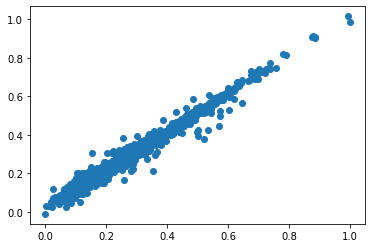

In [20]:
from matplotlib import pyplot as p
p.scatter(y_train, y_pred)

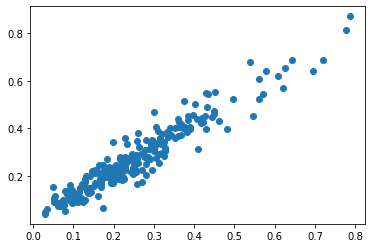

In [21]:
p.scatter(y_test,y_test_pre)

Training same network using RMSProp optimizer

Iteration 2( Datasets:4000)

In [22]:
#Defining the function and generation of data(rosenbrock, n=9)
import numpy as np
import pandas as pd
import random
l=4000
n=9
inputs = np.random.uniform(-1.0, 1.0, size = (l,n))
x1 = inputs[:,0]
x2 = inputs[:,1]
x3 = inputs[:,2]
x4 = inputs[:,3]
x5 = inputs[:,4]
x6 = inputs[:,5]
x7 = inputs[:,6]
x8 = inputs[:,7]
x9 = inputs[:,8]
Y = []
for j in range(l):
    r=0
    for i in range(n-1):
        r = r + (1.0 - inputs[j][i])**2+100.0*((inputs[j][i+1]-inputs[j][i]**2)**2)
    Y.append(r)


In [23]:
# Creating a dataframe for the data generated above
import pandas as pd
data=zip(x1, x2, x3, x4, x5, x6, x7, x8, x9,Y)
data_to_excel=pd.DataFrame(data)
data_to_excel

,0,1,2,3,4,5,6,7,8,9
0,-0.206883,0.852697,-0.148708,-0.399365,0.839563,0.603654,-0.452330,-0.457682,-0.350346,358.413246
1,0.615817,-0.419721,0.531028,-0.592970,0.971124,0.721125,-0.488234,-0.416070,-0.678843,422.576517
2,-0.391637,0.070467,0.566085,-0.921856,0.950514,-0.437901,-0.774276,0.123471,-0.130864,498.235822
3,0.579537,-0.360130,0.475026,-0.600314,-0.514512,-0.235754,-0.471239,0.653623,0.070177,300.273102
4,-0.989561,-0.767196,-0.078181,-0.830144,-0.444441,-0.159704,-0.972486,-0.460818,0.816666,915.658184
...,...,...,...,...,...,...,...,...,...,...
3995,0.397301,0.727731,-0.191298,0.074420,0.655933,-0.794065,-0.795441,0.626860,0.819202,507.710867
3996,-0.986018,-0.999173,0.132562,-0.554396,-0.379696,0.524018,-0.325200,-0.218545,-0.968391,724.179358
3997,-0.271874,-0.201459,-0.074664,-0.443281,0.981656,-0.400721,-0.088511,-0.343278,0.291520,309.655950
3998,-0.798539,-0.513829,0.807778,0.696109,0.869682,-0.897405,0.731114,-0.460166,0.900481,609.076324


In [24]:
#Saving the data generated as excel file
data_to_excel.to_excel('C:\\Users\\satya\\rosenbrock_dataset2.xlsx')

In [25]:
#Reading the data from the excel file created in the previous step
import pandas as pd
data1=pd.read_excel('C:\\Users\\satya\\rosenbrock_dataset2.xlsx')
data1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,-0.206883,0.852697,-0.148708,-0.399365,0.839563,0.603654,-0.452330,-0.457682,-0.350346,358.413246
1,1,0.615817,-0.419721,0.531028,-0.592970,0.971124,0.721125,-0.488234,-0.416070,-0.678843,422.576517
2,2,-0.391637,0.070467,0.566085,-0.921856,0.950514,-0.437901,-0.774276,0.123471,-0.130864,498.235822
3,3,0.579537,-0.360130,0.475026,-0.600314,-0.514512,-0.235754,-0.471239,0.653623,0.070177,300.273102
4,4,-0.989561,-0.767196,-0.078181,-0.830144,-0.444441,-0.159704,-0.972486,-0.460818,0.816666,915.658184
...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.397301,0.727731,-0.191298,0.074420,0.655933,-0.794065,-0.795441,0.626860,0.819202,507.710867
3996,3996,-0.986018,-0.999173,0.132562,-0.554396,-0.379696,0.524018,-0.325200,-0.218545,-0.968391,724.179358
3997,3997,-0.271874,-0.201459,-0.074664,-0.443281,0.981656,-0.400721,-0.088511,-0.343278,0.291520,309.655950
3998,3998,-0.798539,-0.513829,0.807778,0.696109,0.869682,-0.897405,0.731114,-0.460166,0.900481,609.076324


In [26]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data1.values)

In [27]:
X=scaled_data[:,1:10]
y=scaled_data[:,10]

In [28]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0) #Random state: to obtain the same data every time we run kernel

In [29]:
X_train.shape #to know the size of the data

(3400, 9)

In [30]:
#Creating sequential ANN model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
#Creating ANN with mentioned nodes, hidden layers and activation function
model=Sequential()
model.add(Dense(100,input_dim=9,activation='relu'))
model.add(Dense(110,activation='relu'))
model.add(Dense(1,activation='linear'))

In [32]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1000      
                                                                 
 dense_4 (Dense)             (None, 110)               11110     
                                                                 
 dense_5 (Dense)             (None, 1)                 111       
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
#Training the ANN using adam optimiser and MSE loss f.
model.compile(optimizer='adam',loss='MSE')

In [34]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
91/91 [==============================] - 1s 3ms/step - loss: 0.0141 - val_loss: 0.0069
Epoch 2/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 3/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 4/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 5/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/100
91/91 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 7/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 8/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 9/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 10/100
91/91 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 11/

91/91 [==============================] - 0s 1ms/step - loss: 1.9361e-04 - val_loss: 6.0964e-04
Epoch 79/100
91/91 [==============================] - 0s 2ms/step - loss: 2.0134e-04 - val_loss: 5.9700e-04
Epoch 80/100
91/91 [==============================] - 0s 1ms/step - loss: 1.9134e-04 - val_loss: 6.0216e-04
Epoch 81/100
91/91 [==============================] - 0s 1ms/step - loss: 1.7030e-04 - val_loss: 6.4094e-04
Epoch 82/100
91/91 [==============================] - 0s 1ms/step - loss: 2.0129e-04 - val_loss: 5.1996e-04
Epoch 83/100
91/91 [==============================] - 0s 1ms/step - loss: 1.7539e-04 - val_loss: 7.0367e-04
Epoch 84/100
91/91 [==============================] - 0s 2ms/step - loss: 1.7653e-04 - val_loss: 5.2494e-04
Epoch 85/100
91/91 [==============================] - 0s 1ms/step - loss: 1.8784e-04 - val_loss: 5.8412e-04
Epoch 86/100
91/91 [==============================] - 0s 2ms/step - loss: 1.8186e-04 - val_loss: 5.5898e-04
Epoch 87/100
91/91 [=====================

In [35]:
from sklearn.metrics import r2_score

In [36]:
y_train_pre=model.predict(X_train)

107/107 [==============================] - 0s 799us/step


In [37]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.988318568982146

In [38]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

19/19 [==============================] - 0s 1ms/step


0.9621864558894987

In [39]:
#Mean squared error for training data
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

107/107 [==============================] - 0s 874us/step


0.0001697757798745265

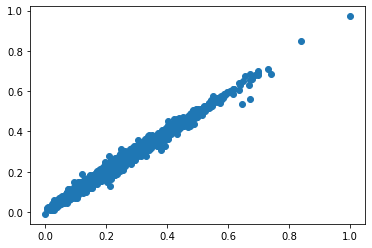

In [40]:
from matplotlib import pyplot as p
p.scatter(y_train, y_pred)

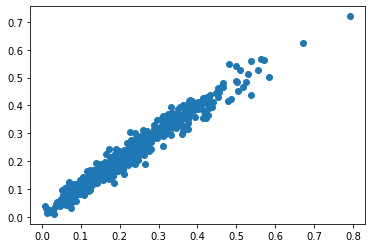

In [41]:
p.scatter(y_test,y_test_pre)

ITERATION 3 (Datasets: 5000)

In [42]:
#Defining the function and generation of data(rosenbrock, n=9)
import numpy as np
import pandas as pd
import random
l=5000
n=9
inputs = np.random.uniform(-1.0, 1.0, size = (l,n))
x1 = inputs[:,0]
x2 = inputs[:,1]
x3 = inputs[:,2]
x4 = inputs[:,3]
x5 = inputs[:,4]
x6 = inputs[:,5]
x7 = inputs[:,6]
x8 = inputs[:,7]
x9 = inputs[:,8]
Y = []
for j in range(l):
    r=0
    for i in range(n-1):
        r = r + (1.0 - inputs[j][i])**2+100.0*((inputs[j][i+1]-inputs[j][i]**2)**2)
    Y.append(r)


In [43]:
# Creating a dataframe for the data generated above
import pandas as pd
data=zip(x1, x2, x3, x4, x5, x6, x7, x8, x9,Y)
data_to_excel=pd.DataFrame(data)
data_to_excel

,0,1,2,3,4,5,6,7,8,9
0,-0.632658,-0.928158,0.485006,-0.451913,-0.497617,0.009955,-0.492590,0.964027,0.255973,428.630727
1,-0.325733,0.909949,-0.272151,-0.911718,0.229385,0.838538,-0.194782,-0.709039,-0.470678,624.002940
2,-0.411114,0.534809,0.542149,-0.818634,-0.759526,0.859820,0.703398,0.681190,0.493185,368.844874
3,-0.850024,0.452924,0.482715,-0.709035,0.694899,-0.167052,0.857078,-0.616770,0.898323,438.845904
4,-0.352646,-0.385685,0.169473,0.231268,0.263557,-0.930912,-0.368239,-0.954186,-0.887772,744.253840
...,...,...,...,...,...,...,...,...,...,...
4995,0.895144,-0.975764,-0.298119,0.822003,0.036902,-0.601660,-0.883675,-0.590936,0.841641,985.824681
4996,0.563901,-0.346976,-0.506026,-0.336787,-0.616366,-0.047595,0.949252,-0.526534,-0.776674,606.802047
4997,0.759429,0.947988,-0.765619,0.835795,0.008261,0.723577,0.357672,-0.262563,0.331595,428.171547
4998,-0.396565,0.619916,-0.068384,-0.760211,0.435683,-0.571185,-0.060241,0.131546,-0.361823,202.285601


In [44]:
#Saving the data generated as excel file
data_to_excel.to_excel('C:\\Users\\satya\\rosenbrock_dataset3.xlsx')

In [45]:
#Reading the data from the excel file created in the previous step
import pandas as pd
data1=pd.read_excel('C:\\Users\\satya\\rosenbrock_dataset3.xlsx')
data1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,-0.632658,-0.928158,0.485006,-0.451913,-0.497617,0.009955,-0.492590,0.964027,0.255973,428.630727
1,1,-0.325733,0.909949,-0.272151,-0.911718,0.229385,0.838538,-0.194782,-0.709039,-0.470678,624.002940
2,2,-0.411114,0.534809,0.542149,-0.818634,-0.759526,0.859820,0.703398,0.681190,0.493185,368.844874
3,3,-0.850024,0.452924,0.482715,-0.709035,0.694899,-0.167052,0.857078,-0.616770,0.898323,438.845904
4,4,-0.352646,-0.385685,0.169473,0.231268,0.263557,-0.930912,-0.368239,-0.954186,-0.887772,744.253840
...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0.895144,-0.975764,-0.298119,0.822003,0.036902,-0.601660,-0.883675,-0.590936,0.841641,985.824681
4996,4996,0.563901,-0.346976,-0.506026,-0.336787,-0.616366,-0.047595,0.949252,-0.526534,-0.776674,606.802047
4997,4997,0.759429,0.947988,-0.765619,0.835795,0.008261,0.723577,0.357672,-0.262563,0.331595,428.171547
4998,4998,-0.396565,0.619916,-0.068384,-0.760211,0.435683,-0.571185,-0.060241,0.131546,-0.361823,202.285601


In [46]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data1.values)

In [47]:
X=scaled_data[:,1:10]
y=scaled_data[:,10]

In [48]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [49]:
X_train.shape #to know the size of the dat

(4250, 9)

In [50]:
#Creating sequential ANN model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [51]:
#Creating ANN with mentioned nodes, hidden layers and activation function
model=Sequential()
model.add(Dense(100,input_dim=9,activation='relu'))
model.add(Dense(110,activation='relu'))
model.add(Dense(1,activation='linear'))

In [52]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1000      
                                                                 
 dense_7 (Dense)             (None, 110)               11110     
                                                                 
 dense_8 (Dense)             (None, 1)                 111       
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
#Training the ANN using adam optimiser and MSE loss f.
model.compile(optimizer='adam',loss='MSE')

In [54]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
113/113 [==============================] - 1s 3ms/step - loss: 0.0196 - val_loss: 0.0077
Epoch 2/100
113/113 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 3/100
113/113 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 4/100
113/113 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 5/100
113/113 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 6/100
113/113 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 7/100
113/113 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 8/100
113/113 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 9/100
113/113 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 10/100
113/113 [==============================] - 0s 1ms/step - loss: 0.0020 - val_lo

113/113 [==============================] - 0s 1ms/step - loss: 2.6183e-04 - val_loss: 7.8009e-04
Epoch 78/100
113/113 [==============================] - 0s 1ms/step - loss: 2.4213e-04 - val_loss: 7.4538e-04
Epoch 79/100
113/113 [==============================] - 0s 1ms/step - loss: 2.3745e-04 - val_loss: 6.9637e-04
Epoch 80/100
113/113 [==============================] - 0s 2ms/step - loss: 2.4318e-04 - val_loss: 6.9341e-04
Epoch 81/100
113/113 [==============================] - 0s 1ms/step - loss: 2.2343e-04 - val_loss: 7.1952e-04
Epoch 82/100
113/113 [==============================] - 0s 1ms/step - loss: 1.9298e-04 - val_loss: 6.7750e-04
Epoch 83/100
113/113 [==============================] - 0s 1ms/step - loss: 2.4082e-04 - val_loss: 0.0010
Epoch 84/100
113/113 [==============================] - 0s 1ms/step - loss: 2.5492e-04 - val_loss: 8.5870e-04
Epoch 85/100
113/113 [==============================] - 0s 1ms/step - loss: 2.3703e-04 - val_loss: 8.5914e-04
Epoch 86/100
113/113 [=====

In [55]:
from sklearn.metrics import r2_score

In [56]:
y_train_pre=model.predict(X_train)

133/133 [==============================] - 0s 732us/step


In [57]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.9890651712287384

In [58]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

24/24 [==============================] - 0s 1ms/step


0.9683974106544544

In [59]:
#Mean squared error for training data
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

133/133 [==============================] - 0s 1ms/step


0.0002146732017498666

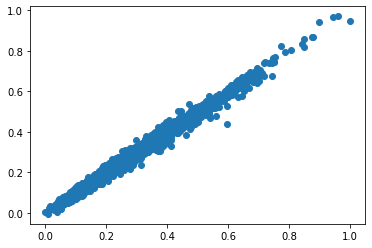

In [60]:
from matplotlib import pyplot as p
p.scatter(y_train, y_pred)

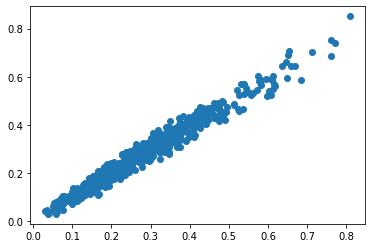

In [61]:
p.scatter(y_test,y_test_pre)